In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.losses import MeanSquaredError

2023-01-18 17:18:30.117450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 17:18:30.485467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 17:18:30.485503: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 17:18:31.340122: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
#(x_train, _), (x_test, _) = datasets.fashion_mnist.load_data()
(x_train, _), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 2

autoencoder = Sequential([
    Flatten(name='encoder_flatten', input_shape=(28, 28)),
    Dense(300, activation='relu', name='encoder_1'),
    Dense(100, activation='relu', name='encoder_2'),
    Dense(latent_dim, activation='relu', name='encoder_output'),
    Dense(100, activation='relu', name='decoder_1'),
    Dense(300, activation='relu', name='decoder_2'),
    Dense(28*28, activation='relu', name='decoder_output'),
    Reshape((28, 28), name='decoder_reshape') 
])

autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
autoencoder.summary()

2023-01-18 17:18:32.531581: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-18 17:18:32.531684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (WL-JJP09C3): /proc/driver/nvidia/version does not exist
2023-01-18 17:18:32.532409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_flatten (Flatten)   (None, 784)               0         
                                                                 
 encoder_1 (Dense)           (None, 300)               235500    
                                                                 
 encoder_2 (Dense)           (None, 100)               30100     
                                                                 
 encoder_output (Dense)      (None, 2)                 202       
                                                                 
 decoder_1 (Dense)           (None, 100)               300       
                                                                 
 decoder_2 (Dense)           (None, 300)               30300     
                                                                 
 decoder_output (Dense)      (None, 784)               2

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0574 - val_loss: 0.0498
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0471 - val_loss: 0.0446
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0434 - val_loss: 0.0424
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0419 - val_loss: 0.0416
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0411 - val_loss: 0.0406
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0398 - val_loss: 0.0404
Epoch 8/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0394 - val_loss: 0.0394
Epoch 9/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0389 - val_loss: 0.0390
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - l

In [5]:
encoder = Sequential()
for layer in autoencoder.layers[:4]:
    encoder.add(layer)
    
decoder = Sequential()
decoder.add(Input(shape=(latent_dim,)))
for layer in autoencoder.layers[4:]:
    decoder.add(layer)

313/313 [==============================] - 0s 1ms/step


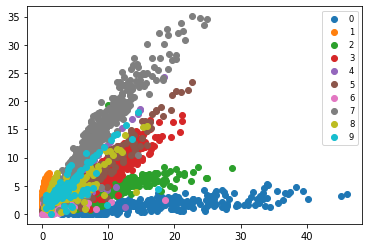

In [6]:
encoding = encoder.predict(x_test)

for i in range(10):

    enc = encoding[(y_test == i),:]
    plt.scatter(enc[:,0], enc[:,1], label=str(i))
plt.legend(fontsize='small')
plt.show()



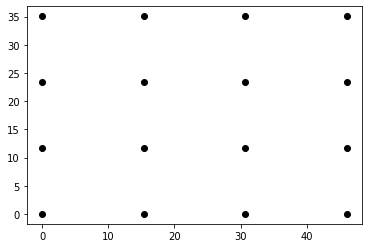

(0.0, 0.0)
1/1 [==============================] - 0s 58ms/step


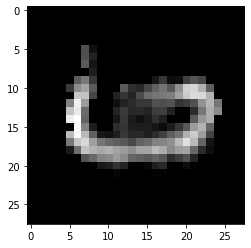



(0.0, 11.686214447021484)
1/1 [==============================] - 0s 18ms/step


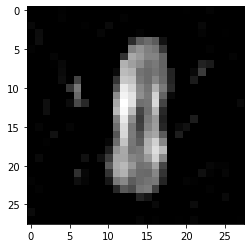



(0.0, 23.37242889404297)
1/1 [==============================] - 0s 18ms/step


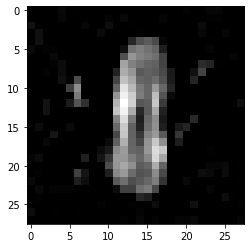



(0.0, 35.05864334106445)
1/1 [==============================] - 0s 18ms/step


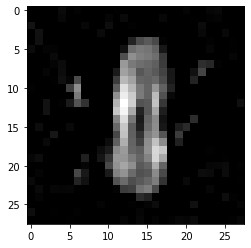



(15.345277150472006, 0.0)
1/1 [==============================] - 0s 20ms/step


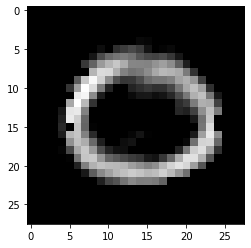



(15.345277150472006, 11.686214447021484)
1/1 [==============================] - 0s 19ms/step


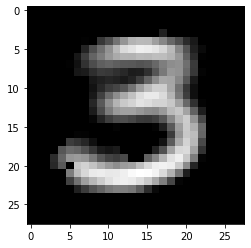



(15.345277150472006, 23.37242889404297)
1/1 [==============================] - 0s 19ms/step


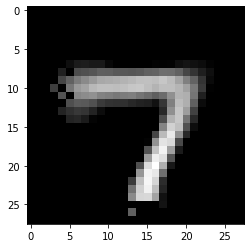



(15.345277150472006, 35.05864334106445)
1/1 [==============================] - 0s 20ms/step


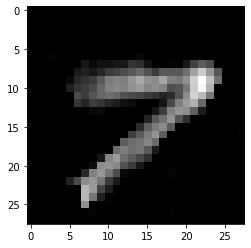



(30.69055430094401, 0.0)
1/1 [==============================] - 0s 21ms/step


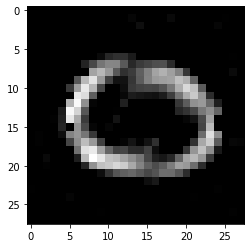



(30.69055430094401, 11.686214447021484)
1/1 [==============================] - 0s 21ms/step


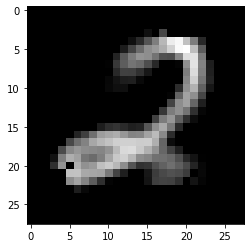



(30.69055430094401, 23.37242889404297)
1/1 [==============================] - 0s 23ms/step


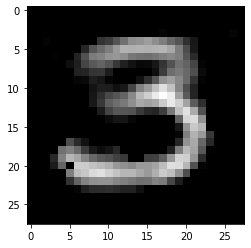



(30.69055430094401, 35.05864334106445)
1/1 [==============================] - 0s 23ms/step


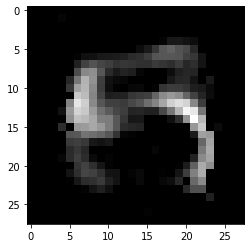



(46.035831451416016, 0.0)
1/1 [==============================] - 0s 23ms/step


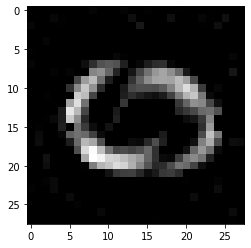



(46.035831451416016, 11.686214447021484)
1/1 [==============================] - 0s 20ms/step


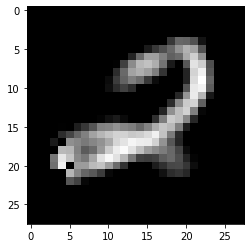



(46.035831451416016, 23.37242889404297)
1/1 [==============================] - 0s 20ms/step


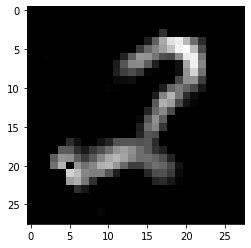



(46.035831451416016, 35.05864334106445)
1/1 [==============================] - 0s 19ms/step


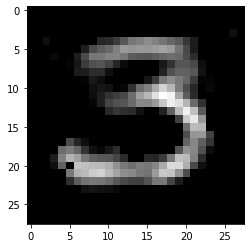

In [7]:
n = 4

x = np.linspace(encoding[:,0].min(), encoding[:,0].max(), num=n)
y = np.linspace(encoding[:,1].min(), encoding[:,1].max(), num=n)
    
xv, yv = np.meshgrid(x, y, indexing='ij')


plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

for i in range(n):
    for j in range(n):

        print((xv[i,j], yv[i,j]))
        enco = np.expand_dims((xv[i,j], yv[i,j]), axis=0)
        plt.imshow(decoder.predict(enco)[0], cmap='gray')
        plt.show()
        print()
        print()